In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("GlobalWeatherRepository.csv")

df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114008 entries, 0 to 114007
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       114008 non-null  object 
 1   location_name                 114008 non-null  object 
 2   latitude                      114008 non-null  float64
 3   longitude                     114008 non-null  float64
 4   timezone                      114008 non-null  object 
 5   last_updated_epoch            114008 non-null  int64  
 6   last_updated                  114008 non-null  object 
 7   temperature_celsius           114008 non-null  float64
 8   temperature_fahrenheit        114008 non-null  float64
 9   condition_text                114008 non-null  object 
 10  wind_mph                      114008 non-null  float64
 11  wind_kph                      114008 non-null  float64
 12  wind_degree                   114008 non-nul

In [6]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,114008.000000,114008.000000,1.140080e+05,114008.000000,114008.000000,114008.000000,114008.000000,114008.000000,114008.000000,114008.000000,...,114008.000000,114008.000000,114008.000000,114008.000000,114008.000000,114008.000000,114008.000000,114008.000000,114008.000000,114008.000000
mean,19.181026,22.010563,1.741220e+09,22.216282,71.991087,8.101230,13.041249,169.924233,1014.088476,29.945376,...,18.295733,490.729315,60.167752,15.482558,10.866855,25.011818,50.265725,1.723344,2.666629,49.424172
std,24.436598,65.794968,1.463622e+07,9.064907,16.316625,7.531091,12.117292,102.965894,10.826518,0.319665,...,14.181719,805.695869,31.599071,24.932236,38.239826,38.795003,154.987034,0.959452,2.498081,35.146321
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.728554e+09,17.200000,63.000000,4.000000,6.500000,82.000000,1010.000000,29.830000,...,10.400000,220.300000,40.000000,1.480000,0.950000,7.215000,10.300000,1.000000,1.000000,15.000000
50%,17.250000,23.316700,1.741254e+09,24.300000,75.700000,6.900000,11.200000,163.000000,1014.000000,29.930000,...,15.600000,312.237000,57.000000,5.300000,2.405000,14.550000,20.753000,1.000000,2.000000,49.000000
75%,40.400000,50.580000,1.753864e+09,28.200000,82.800000,11.200000,18.000000,255.000000,1018.000000,30.060000,...,24.200000,486.550000,76.000000,17.945000,8.750000,28.490000,43.105000,2.000000,3.000000,84.000000
max,64.150000,179.220000,1.766474e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114008 entries, 0 to 114007
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       114008 non-null  object 
 1   location_name                 114008 non-null  object 
 2   latitude                      114008 non-null  float64
 3   longitude                     114008 non-null  float64
 4   timezone                      114008 non-null  object 
 5   last_updated_epoch            114008 non-null  int64  
 6   last_updated                  114008 non-null  object 
 7   temperature_celsius           114008 non-null  float64
 8   temperature_fahrenheit        114008 non-null  float64
 9   condition_text                114008 non-null  object 
 10  wind_mph                      114008 non-null  float64
 11  wind_kph                      114008 non-null  float64
 12  wind_degree                   114008 non-nul

In [8]:
x = df[["temperature_celsius","wind_kph","humidity","pressure_mb"]]

x.isnull().sum()

temperature_celsius    0
wind_kph               0
humidity               0
pressure_mb            0
dtype: int64

In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
score = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k , random_state = 42)
    kmeans.fit(x_scaled)
    score.append(kmeans.inertia_)

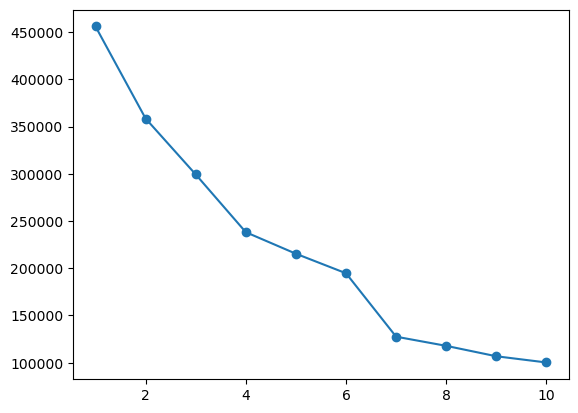

In [11]:
plt.plot(range(1,11),score , marker ="o")
plt.show()

In [12]:
kmean = KMeans(n_clusters=4,random_state=42)
clusters = kmean.fit_predict(x_scaled)

In [38]:
features = x.copy()
features['clusters'] = clusters
features.head()


,temperature_celsius,wind_kph,humidity,pressure_mb,clusters
0,26.6,13.3,24,1012.0,3
1,19.0,11.2,94,1012.0,0
2,23.0,15.1,29,1011.0,3
3,6.3,11.9,61,1007.0,1
4,26.0,13.0,89,1011.0,0


In [18]:
print(kmean.cluster_centers_)

[[ 3.44340799e-01  4.76749004e-02  5.60452478e-01 -2.01787117e-01]
 [-1.36411008e+00 -1.73179625e-01  3.80203439e-01  4.97729173e-01]
 [ 3.12986170e-02  2.43467913e+02 -5.56357807e-01 -8.17221525e-03]
 [ 6.56274935e-01  6.88794045e-02 -1.29851696e+00 -1.10045847e-01]]


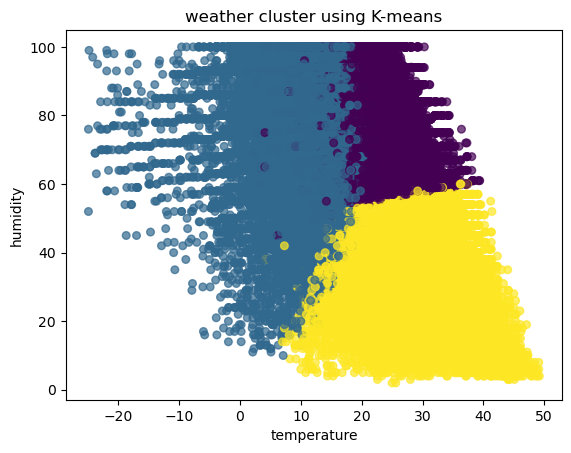

In [28]:
plt.scatter(features["temperature_celsius"],features["humidity"],c=clusters,cmap="viridis",s=30,alpha=0.7)
plt.xlabel("temperature")
plt.ylabel("humidity")
plt.title("weather cluster using K-means")
plt.show()